# Day2


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [31]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data = data.dropna()

# Explore the distribution of numerical variables
print(data.describe())

# Handle outliers (e.g., assuming 'price' is the target variable)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653

KeyError: 'price'

In [32]:
from sklearn.model_selection import train_test_split

# Select the features (independent variables) and the target variable
X = data.drop('parking', axis=1)
y = data['parking']

# Split the dataset into training and testing sets (e.g., 70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: "['parking'] not found in axis"

Selected Features: ['area', 'bedrooms', 'bathrooms', 'stories']
R-squared (R2) with Lasso: 0.5137585083333482


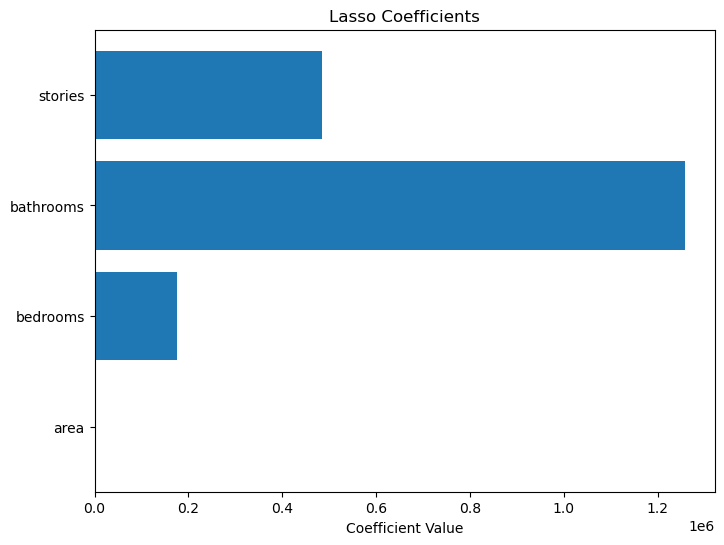

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Lasso regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for different regularization strengths

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate the R-squared value
r2 = lasso_model.score(X_test, y_test)

# Discuss the impact of L1 regularization
# Let's analyze the coefficients and their impact on feature selection
feature_names = X.columns
selected_features = [feature for feature, coef in zip(feature_names, coefficients) if coef != 0]

print("Selected Features:", selected_features)
print("R-squared (R2) with Lasso:", r2)

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Lasso regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for different regularization strengths

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Discuss how Lasso helps prevent overfitting and reduces the impact of irrelevant features
# Lasso regularization introduces sparsity in the coefficients, effectively performing feature selection.
# It encourages some coefficients to be exactly zero, removing irrelevant features and preventing overfitting.

Mean Absolute Error (MAE): 1158970.4874243366
Mean Squared Error (MSE): 2457741776323.832
Root Mean Squared Error (RMSE): 1567718.653433655


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Ridge regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for different regularization strengths

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Value:", r2)

# Explain L2 regularization in Ridge regression vs. L1 regularization in Lasso
# L2 regularization in Ridge regression adds a penalty term that discourages the magnitude of coefficients from becoming too large.
# It minimizes the sum of squared coefficients. It doesn't result in exact zero coefficients but shrinks them.
# L1 regularization in Lasso, on the other hand, adds a penalty term that can result in exact zero coefficients, effective

Mean Absolute Error (MAE): 1158471.4534767317
Mean Squared Error (MSE): 2456765538413.524
Root Mean Squared Error (RMSE): 1567407.2662883517
R-squared (R2) Value: 0.5139516479797922


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Ridge regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for different regularization strengths

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Discuss the benefits of Ridge regression in handling multicollinearity
# Ridge regression adds a penalty to the magnitude of coefficients, which helps handle multicollinearity among features.
# Multicollinearity is when independent variables are highly correlated, making it difficult to distinguish their individual effects.
# Ridge regression redistributes the contribution of correlated features and prevents overemphasis on any single feature, im

Mean Absolute Error (MAE): 1158471.4534767317
Mean Squared Error (MSE): 2456765538413.524
Root Mean Squared Error (RMSE): 1567407.2662883517


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Lasso regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for different regularization strengths
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Implement Ridge regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for different regularization strengths
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calculate evaluation metrics for Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Lasso Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R2) Value:", r2_lasso)

print("\nRidge Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R2) Value:", r2_ridge)

# Discuss when to use Lasso, Ridge, or plain linear regression
# - Use plain linear regression when you assume that all features are relevant and multicollinearity is not a concern.
# - Use Ridge regression when multicollinearity is present and you want to prevent overfitting while retaining all features.
# - Use Lasso regression when you want to perform feature selection and eliminate irrelevant features due to L1 regularization

Lasso Regression Metrics:
Mean Absolute Error (MAE): 1158970.4874243366
Mean Squared Error (MSE): 2457741776323.832
Root Mean Squared Error (RMSE): 1567718.653433655
R-squared (R2) Value: 0.5137585083333482

Ridge Regression Metrics:
Mean Absolute Error (MAE): 1158471.4534767317
Mean Squared Error (MSE): 2456765538413.524
Root Mean Squared Error (RMSE): 1567407.2662883517
R-squared (R2) Value: 0.5139516479797922


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Lasso
alphas_lasso = [0.1, 0.5, 1.0, 2.0, 5.0]  # Different alpha values to try

for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Lasso with alpha={alpha}:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Value:", r2)
    print()
# Hyperparameter tuning for Ridge
alphas_ridge = [0.1, 0.5, 1.0, 2.0, 5.0]  # Different alpha values to try

for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Ridge with alpha={alpha}:")
    print("Mean Squared Error (MSE):",mse)
    print("R-squared(R2)Value:",r2)
    print()

SyntaxError: invalid non-printable character U+00A0 (3508892885.py, line 46)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset using pandas
data = pd.read_csv('Housing.csv')

# Define the features (independent variables) and target (dependent variable)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = data['price']

# Perform one-hot encoding for categorical variables (e.g., 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing')
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], drop_first=True)

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Lasso
alpha_lasso = 1.0  # Adjust the alpha value for Lasso regularization
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
# Hyperparameter tuning for Ridge
alpha_ridge = 1.0  # Adjust the alpha value for Ridge regularization
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calculate evaluation metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression Metrics:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R2) Value:", r2_lasso)
print()

print("Ridge Regression Metrics:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R2) Value:", r2_ridge)

Lasso Regression Metrics:
Mean Squared Error (MSE): 1739555200404.3672
R-squared (R2) Value: 0.6558450836335328

Ridge Regression Metrics:
Mean Squared Error (MSE): 1740213132762.3284
R-squared (R2) Value: 0.6557149177982802


#2

In [20]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('Employee.csv')

# Select the independent variable (experience) and the dependent variable (performance)
X = data['ExperienceInCurrentDomain']
y = data['PaymentTier']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PaymentTier   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.561
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.212
Time:                        10:19:51   Log-Likelihood:                -3915.1
No. Observations:                4653   AIC:                             7834.
Df Residuals:                    4651   BIC:                             7847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

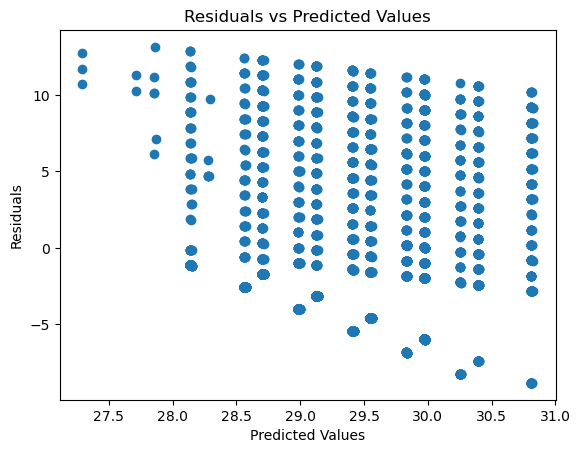

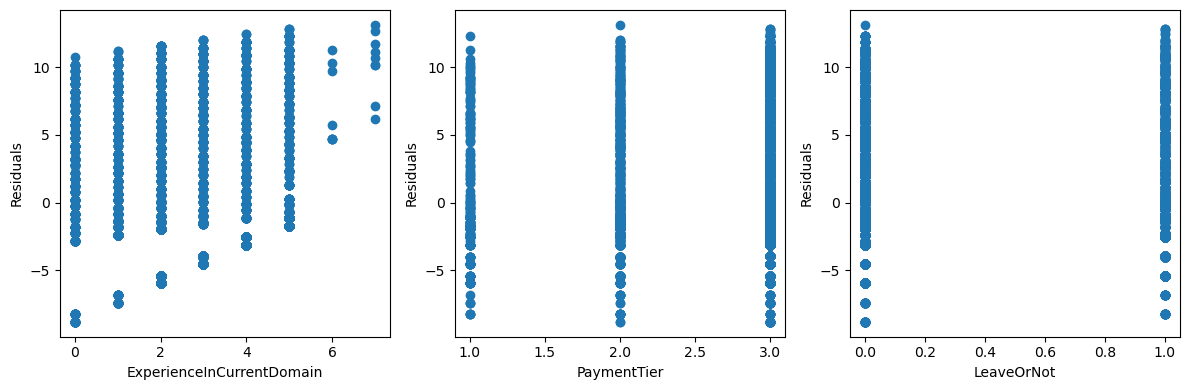

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Employee.csv')

# Select the independent variables (experience, education level, number of projects)
X = data[['ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot']]
y = data['Age']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Obtain the residuals
residuals = model.resid

# Plot the residuals against the predicted values
plt.scatter(model.predict(X), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot the residuals against each independent variable
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, var in enumerate(X.columns[1:]):
    axes[i].scatter(X[var], residuals)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Residuals')
plt.tight_layout()
plt.show()

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('Employee.csv')

# Select the independent variables (experience, education level, number of projects)
X = data[['ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot']]
y = data['Age']

# Log transform the variables
X_transformed = np.log(X + 1)
y_transformed = np.log(y + 1)

# Add a constant term to the predictor variables
X_transformed = sm.add_constant(X_transformed)

# Fit the WLS regression model
weights = 1 / np.var(y_transformed)
model_wls = sm.WLS(y_transformed, X_transformed, weights=weights).fit()

# Print the model summary
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.029
Model:                            WLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     46.47
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.39e-29
Time:                        10:20:38   Log-Likelihood:                 2268.5
No. Observations:                4653   AIC:                            -4529.
Df Residuals:                    4649   BIC:                            -4503.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [23]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('Employee.csv')

# Select the independent variables (experience, education level, number of projects)
X = data[['ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot']]

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Print the correlation matrix
print(correlation_matrix)

                           ExperienceInCurrentDomain  PaymentTier  LeaveOrNot
ExperienceInCurrentDomain                   1.000000     0.018314   -0.030504
PaymentTier                                 0.018314     1.000000   -0.197638
LeaveOrNot                                 -0.030504    -0.197638    1.000000


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs
vifs = pd.DataFrame()
vifs["Variable"] = X.columns
vifs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIFs
print(vifs)

                    Variable       VIF
0  ExperienceInCurrentDomain  3.990924
1                PaymentTier  4.205945
2                 LeaveOrNot  1.425770


In [25]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('Employee.csv')

# Select the independent variables (experience, education level, number of projects)
X = data[['ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot']]
y = data['Age']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     33.54
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.94e-21
Time:                        10:21:32   Log-Likelihood:                -13876.
No. Observations:                4653   AIC:                         2.776e+04
Df Residuals:                    4649   BIC:                         2.779e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Employee.csv')

# Select the independent variables (experience, education level, number of projects)
X = data[['ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot']]
y = data['Age']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Get predicted values
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, y_pred, squared=False)

# Print the evaluation metrics
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:",rmse)

R-squared: 0.02118289248434746
MAE: 3.839933692810192
MSE: 22.792843038078207
RMSE: 4.774185065336094
